<a href="https://colab.research.google.com/github/etgcrog/rede-nerural/blob/Categorical/bikes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [46]:
df = pd.read_csv("day.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [48]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [49]:
df.drop(['instant', 'casual', 'registered', 'yr'], axis=1, inplace=True)

In [50]:
df = df.set_index(pd.DatetimeIndex(df['dteday']))
df.drop(['dteday'], axis=1, inplace=True)

<Axes: >

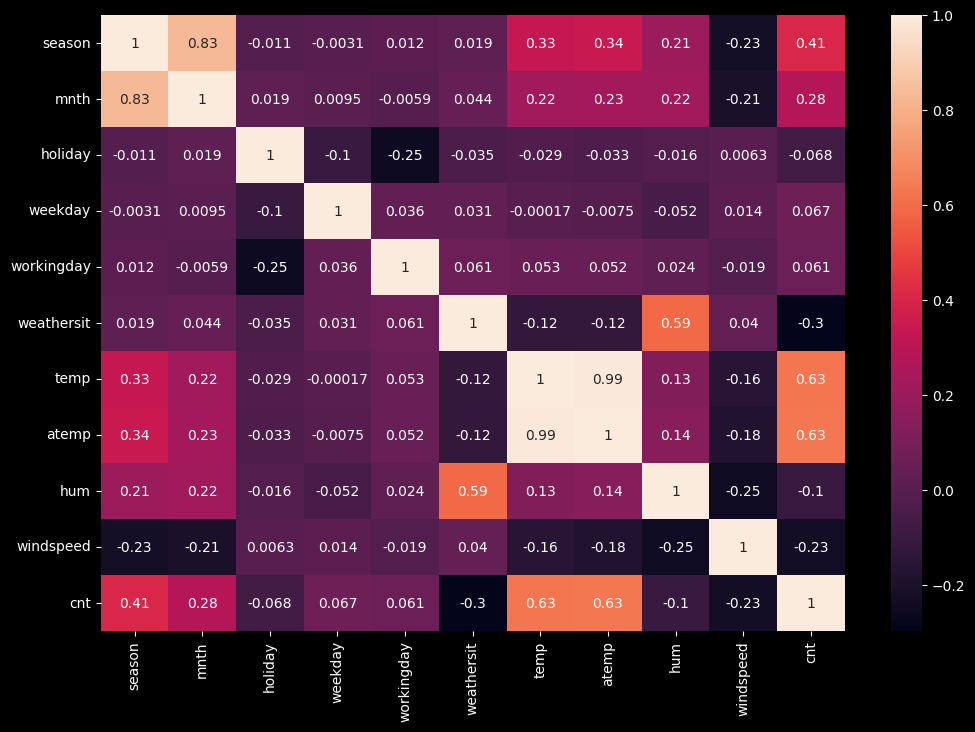

In [51]:
plt.style.use("dark_background")
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

Text(0, 0.5, 'Quantidade')

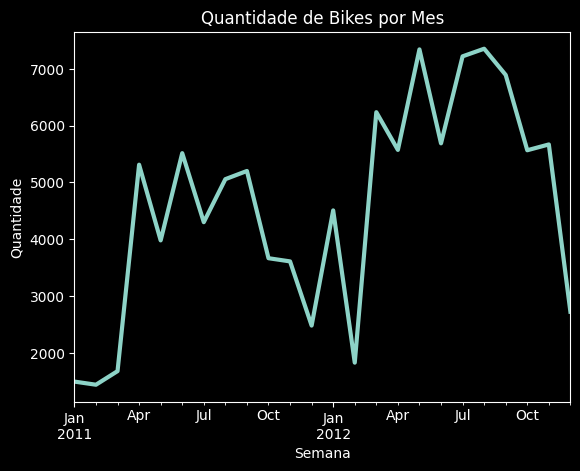

In [52]:
df['cnt'].asfreq('M').plot(linewidth=3)
plt.title("Quantidade de Bikes por Mes")
plt.xlabel('Semana')
plt.ylabel('Quantidade')

In [53]:
df.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
2011-01-05,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [54]:
df_numerical = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
df_categorical = df[['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]

In [55]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df_categorical).toarray()

In [56]:
df_numerical = df_numerical.reset_index()

In [57]:
df_categorical = pd.DataFrame(encoded)

df_final = pd.concat([df_categorical, df_numerical], axis=1)

In [58]:
df_final.drop("dteday", axis=1, inplace=True)

In [59]:
df_final.head(2)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.344167,0.363625,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.363478,0.353739,0.696087,0.248539,801


In [60]:
X = df_final.drop('cnt', axis=1)
y = df_final['cnt'].array.reshape(-1, 1)

In [61]:
scaler = MinMaxScaler()
scaler.fit(y)
y = scaler.transform(y)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
input_shape = x_train.shape[1]

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape=(input_shape,)))
model.add(tf.keras.layers.Dense(units=100 ,activation='relu'))
model.add(tf.keras.layers.Dense(units=100 ,activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               3500      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 23,801
Trainable params: 23,801
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.compile(optimizer='Adam', loss='mean_squared_error')

In [66]:
history = model.fit(x_train, y_train, epochs=20, batch_size=50, validation_split=0.2)

Epoch 1/20
9/9 [==============================] - 1s 27ms/step - loss: 0.1423 - val_loss: 0.0975
Epoch 2/20
9/9 [==============================] - 0s 9ms/step - loss: 0.0584 - val_loss: 0.0409
Epoch 3/20
9/9 [==============================] - 0s 8ms/step - loss: 0.0404 - val_loss: 0.0315
Epoch 4/20
9/9 [==============================] - 0s 9ms/step - loss: 0.0320 - val_loss: 0.0337
Epoch 5/20
9/9 [==============================] - 0s 7ms/step - loss: 0.0265 - val_loss: 0.0284
Epoch 6/20
9/9 [==============================] - 0s 11ms/step - loss: 0.0238 - val_loss: 0.0300
Epoch 7/20
9/9 [==============================] - 0s 9ms/step - loss: 0.0229 - val_loss: 0.0277
Epoch 8/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0210 - val_loss: 0.0289
Epoch 9/20
9/9 [==============================] - 0s 9ms/step - loss: 0.0204 - val_loss: 0.0285
Epoch 10/20
9/9 [==============================] - 0s 10ms/step - loss: 0.0196 - val_loss: 0.0304
Epoch 11/20
9/9 [==================

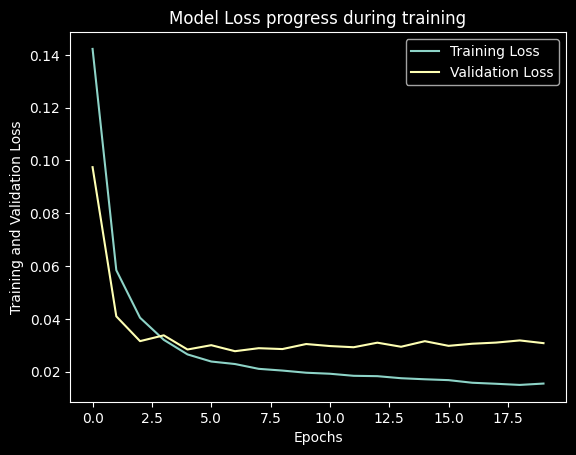

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss progress during training")
plt.xlabel("Epochs")
plt.ylabel('Training and Validation Loss')
plt.legend(["Training Loss", "Validation Loss"])